In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [0]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [83]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [0]:
word_index = reuters.get_word_index()


In [0]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [0]:
decoded_newswires = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [0]:
import numpy as np
def vectorize_data(sequences,dimension=10000):
  results =  np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [0]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

In [0]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1
  return results
 


In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [0]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
patrial_y_train = one_hot_train_labels[1000:]

In [105]:
history = model.fit(partial_x_train,patrial_y_train,epochs = 20,batch_size = 512,validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 174us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 148us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210


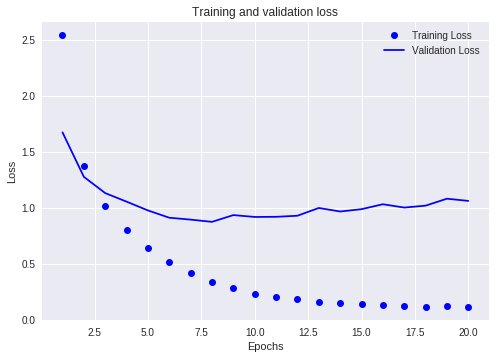

In [106]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

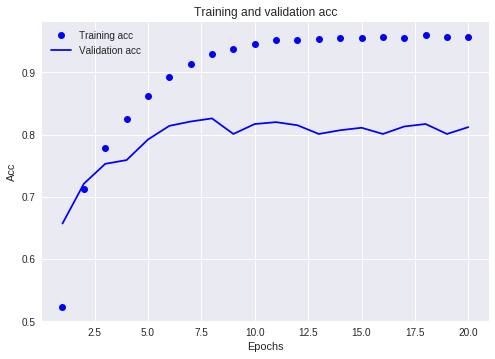

In [107]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [114]:
history = model.fit(partial_x_train,patrial_y_train,epochs = 15,batch_size = 512,validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 1s 179us/step - loss: 2.5058 - acc: 0.5494 - val_loss: 1.6306 - val_acc: 0.6490
Epoch 2/15
7982/7982 [==============================] - 1s 142us/step - loss: 1.3512 - acc: 0.7141 - val_loss: 1.2588 - val_acc: 0.7210
Epoch 3/15
7982/7982 [==============================] - 1s 143us/step - loss: 1.0074 - acc: 0.7865 - val_loss: 1.0972 - val_acc: 0.7620
Epoch 4/15
7982/7982 [==============================] - 1s 147us/step - loss: 0.8027 - acc: 0.8275 - val_loss: 1.0113 - val_acc: 0.7900
Epoch 5/15
7982/7982 [==============================] - 1s 142us/step - loss: 0.6363 - acc: 0.8658 - val_loss: 0.9585 - val_acc: 0.8070
Epoch 6/15
7982/7982 [==============================] - 1s 142us/step - loss: 0.5086 - acc: 0.8938 - val_loss: 0.9250 - val_acc: 0.8130
Epoch 7/15
7982/7982 [==============================] - 1s 142us/step - loss: 0.4074 - acc: 0.9122 - val_loss: 0.9005 - val_acc: 0.8180


In [118]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 7,batch_size = 512,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 2s 194us/step - loss: 2.5526 - acc: 0.5337 - val_loss: 1.6640 - val_acc: 0.6480
Epoch 2/7
7982/7982 [==============================] - 1s 142us/step - loss: 1.3705 - acc: 0.7152 - val_loss: 1.2726 - val_acc: 0.7300
Epoch 3/7
7982/7982 [==============================] - 1s 142us/step - loss: 1.0309 - acc: 0.7790 - val_loss: 1.1325 - val_acc: 0.7520
Epoch 4/7
7982/7982 [==============================] - 1s 142us/step - loss: 0.8156 - acc: 0.8279 - val_loss: 1.0452 - val_acc: 0.7710
Epoch 5/7
7982/7982 [==============================] - 1s 141us/step - loss: 0.6565 - acc: 0.8616 - val_loss: 1.0405 - val_acc: 0.7670
Epoch 6/7
7982/7982 [==============================] - 1s 142us/step - loss: 0.5345 - acc: 0.8900 - val_loss: 0.9469 - val_acc: 0.8130
Epoch 7/7
2246/2246 [==============================] - 0s 94us/step


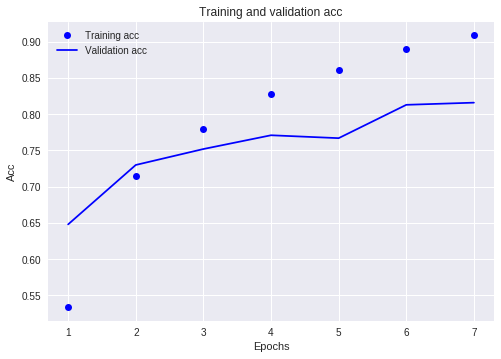

In [119]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [120]:
results

[1.005133425244665, 0.7787177204183457]

In [121]:
model = models.Sequential()
model.add(layers.Dense(128,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 20,batch_size = 512,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 238us/step - loss: 2.4077 - acc: 0.5502 - val_loss: 1.4925 - val_acc: 0.6720
Epoch 2/20
7982/7982 [==============================] - 2s 188us/step - loss: 1.1962 - acc: 0.7452 - val_loss: 1.1580 - val_acc: 0.7420
Epoch 3/20
7982/7982 [==============================] - 2s 195us/step - loss: 0.8356 - acc: 0.8234 - val_loss: 1.0161 - val_acc: 0.7860
Epoch 4/20
7982/7982 [==============================] - 2s 209us/step - loss: 0.6153 - acc: 0.8718 - val_loss: 0.9807 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.4512 - acc: 0.9094 - val_loss: 0.8970 - val_acc: 0.8160
Epoch 6/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.3574 - acc: 0.9253 - val_loss: 0.8638 - val_acc: 0.8220
Epoch 7/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.2803 - acc: 0.9406 - val_loss: 0.9429 - val_acc: 0.7940


In [123]:
model = models.Sequential()
model.add(layers.Dense(128,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 14,batch_size = 512,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/14
7982/7982 [==============================] - 2s 273us/step - loss: 2.4179 - acc: 0.4610 - val_loss: 1.5522 - val_acc: 0.6240
Epoch 2/14
7982/7982 [==============================] - 2s 192us/step - loss: 1.3037 - acc: 0.7046 - val_loss: 1.2263 - val_acc: 0.7250
Epoch 3/14
7982/7982 [==============================] - 2s 194us/step - loss: 0.9628 - acc: 0.7897 - val_loss: 1.0792 - val_acc: 0.7600
Epoch 4/14
7982/7982 [==============================] - 2s 194us/step - loss: 0.7208 - acc: 0.8435 - val_loss: 0.9967 - val_acc: 0.7910
Epoch 5/14
7982/7982 [==============================] - 2s 198us/step - loss: 0.5524 - acc: 0.8810 - val_loss: 0.9452 - val_acc: 0.8010
Epoch 6/14
7982/7982 [==============================] - 2s 193us/step - loss: 0.4145 - acc: 0.9134 - val_loss: 0.9953 - val_acc: 0.7900
Epoch 7/14
7982/7982 [==============================] - 2s 193us/step - loss: 0.3325 - acc: 0.9273 - val_loss: 0.9079 - val_acc: 0.8090


In [124]:
model = models.Sequential()
model.add(layers.Dense(32,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 20,batch_size = 512,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 3.0531 - acc: 0.4184 - val_loss: 2.3270 - val_acc: 0.5660
Epoch 2/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.9356 - acc: 0.6434 - val_loss: 1.7007 - val_acc: 0.6460
Epoch 3/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.4489 - acc: 0.7037 - val_loss: 1.4333 - val_acc: 0.6980
Epoch 4/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.1861 - acc: 0.7468 - val_loss: 1.2789 - val_acc: 0.7240
Epoch 5/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.0051 - acc: 0.7828 - val_loss: 1.1722 - val_acc: 0.7340
Epoch 6/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.8590 - acc: 0.8160 - val_loss: 1.0987 - val_acc: 0.7680
Epoch 7/20
7982/7982 [==============================] - 1s 114us/step - loss: 0.7424 - acc: 0.8430 - val_loss: 1.0489 - val_acc: 0.7830


In [125]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 20,batch_size = 512,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 217us/step - loss: 2.6642 - acc: 0.5571 - val_loss: 1.8676 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 140us/step - loss: 1.5027 - acc: 0.7255 - val_loss: 1.3577 - val_acc: 0.7140
Epoch 3/20
7982/7982 [==============================] - 1s 140us/step - loss: 1.0741 - acc: 0.7890 - val_loss: 1.1338 - val_acc: 0.7740
Epoch 4/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.8282 - acc: 0.8360 - val_loss: 1.0093 - val_acc: 0.7910
Epoch 5/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.6605 - acc: 0.8702 - val_loss: 0.9306 - val_acc: 0.8130
Epoch 6/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.5377 - acc: 0.8943 - val_loss: 0.9003 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.4440 - acc: 0.9128 - val_loss: 0.8514 - val_acc: 0.8270


In [126]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 7,batch_size = 256,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 2s 233us/step - loss: 2.1676 - acc: 0.6014 - val_loss: 1.4595 - val_acc: 0.6990
Epoch 2/7
7982/7982 [==============================] - 1s 147us/step - loss: 1.1538 - acc: 0.7661 - val_loss: 1.1218 - val_acc: 0.7650
Epoch 3/7
7982/7982 [==============================] - 1s 149us/step - loss: 0.8246 - acc: 0.8300 - val_loss: 0.9751 - val_acc: 0.8030
Epoch 4/7
7982/7982 [==============================] - 1s 148us/step - loss: 0.6197 - acc: 0.8780 - val_loss: 0.8944 - val_acc: 0.8190
Epoch 5/7
7982/7982 [==============================] - 1s 147us/step - loss: 0.4762 - acc: 0.9033 - val_loss: 0.8419 - val_acc: 0.8270
Epoch 6/7
7982/7982 [==============================] - 1s 149us/step - loss: 0.3732 - acc: 0.9251 - val_loss: 0.8231 - val_acc: 0.8230
Epoch 7/7
2246/2246 [==============================] - 0s 100us/step


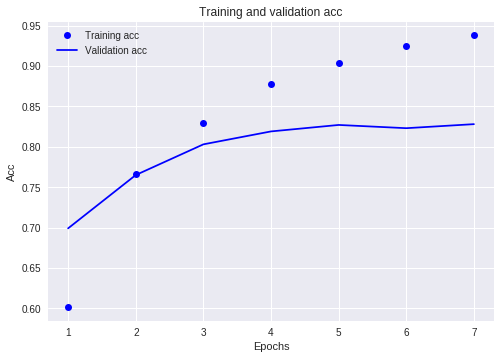

In [127]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [128]:
model = models.Sequential()
model.add(layers.Dense(32,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 20,batch_size = 256,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 221us/step - loss: 2.5390 - acc: 0.5666 - val_loss: 1.8190 - val_acc: 0.6300
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.4891 - acc: 0.6933 - val_loss: 1.3497 - val_acc: 0.6920
Epoch 3/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.1078 - acc: 0.7653 - val_loss: 1.1364 - val_acc: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.8877 - acc: 0.8166 - val_loss: 1.0251 - val_acc: 0.7940
Epoch 5/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.7317 - acc: 0.8505 - val_loss: 0.9575 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.6110 - acc: 0.8751 - val_loss: 0.9050 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.5127 - acc: 0.8959 - val_loss: 0.8685 - val_acc: 0.8190


In [130]:
model = models.Sequential()
model.add(layers.Dense(32,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 9,batch_size = 256,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 216us/step - loss: 2.4918 - acc: 0.5614 - val_loss: 1.7747 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.4571 - acc: 0.7090 - val_loss: 1.3145 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.0836 - acc: 0.7757 - val_loss: 1.1193 - val_acc: 0.7690
Epoch 4/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.8702 - acc: 0.8191 - val_loss: 1.0167 - val_acc: 0.7910
Epoch 5/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.7162 - acc: 0.8512 - val_loss: 0.9524 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.5966 - acc: 0.8768 - val_loss: 0.9174 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.4996 - acc: 0.8980 - val_loss: 0.8720 - val_acc: 0.8250
Epoch 8

In [131]:
model = models.Sequential()
model.add(layers.Dense(128,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 20,batch_size = 512,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 299us/step - loss: 2.2250 - acc: 0.6066 - val_loss: 1.4439 - val_acc: 0.7090
Epoch 2/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.1201 - acc: 0.7790 - val_loss: 1.0969 - val_acc: 0.7780
Epoch 3/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.7761 - acc: 0.8484 - val_loss: 0.9525 - val_acc: 0.8000
Epoch 4/20
7982/7982 [==============================] - 2s 192us/step - loss: 0.5713 - acc: 0.8886 - val_loss: 0.8654 - val_acc: 0.8220
Epoch 5/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.4358 - acc: 0.9133 - val_loss: 0.8287 - val_acc: 0.8210
Epoch 6/20
7982/7982 [==============================] - 2s 191us/step - loss: 0.3380 - acc: 0.9310 - val_loss: 0.8144 - val_acc: 0.8230
Epoch 7/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.2746 - acc: 0.9390 - val_loss: 0.8070 - val_acc: 0.8250


In [132]:
model = models.Sequential()
model.add(layers.Dense(128,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train,patrial_y_train,epochs = 7,batch_size = 512,validation_data = (x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 2s 300us/step - loss: 2.1803 - acc: 0.5856 - val_loss: 1.4167 - val_acc: 0.7020
Epoch 2/7
7982/7982 [==============================] - 2s 192us/step - loss: 1.0994 - acc: 0.7752 - val_loss: 1.0879 - val_acc: 0.7800
Epoch 3/7
7982/7982 [==============================] - 2s 192us/step - loss: 0.7670 - acc: 0.8467 - val_loss: 0.9516 - val_acc: 0.8060
Epoch 4/7
7982/7982 [==============================] - 2s 193us/step - loss: 0.5675 - acc: 0.8905 - val_loss: 0.8767 - val_acc: 0.8130
Epoch 5/7
7982/7982 [==============================] - 2s 196us/step - loss: 0.4309 - acc: 0.9118 - val_loss: 0.8355 - val_acc: 0.8180
Epoch 6/7
7982/7982 [==============================] - 2s 197us/step - loss: 0.3393 - acc: 0.9295 - val_loss: 0.8077 - val_acc: 0.8330
Epoch 7/7
2246/2246 [==============================] - 0s 135us/step


In [133]:
results

[0.8946056457257971, 0.8018699911483568]

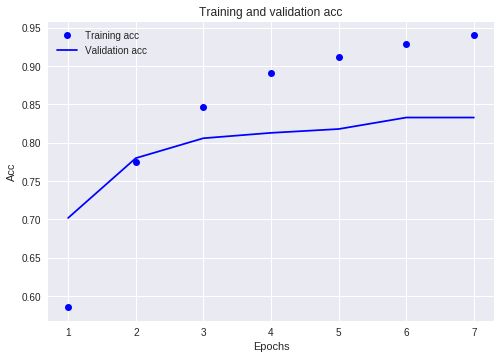

In [134]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()